# Gradient Descent - Linear Regression with Scikit Library

Scikit documentation: https://scikit-learn.org/stable/index.html

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor # Linear Regression powered by Stochastic Gradient Descent
from sklearn.preprocessing import StandardScaler # Scales to unit variance
from lab_utils_multi import load_house_data
from lab_utils_common import dlc
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')

First we simply loaded the data:

In [ ]:
X_train, Y_train = load_house_data()
X_features = ['size(sqft)', 'bedrooms', 'floors', 'age']

Second step is to scale (fit the data accordingly and calculate the mean & std)
<br>
In machine learning, fitting before transforming is crucial because the fitting process learns the necessary parameters (such as means, standard deviations, or min/max values) from the data, which are then used to perform the transformation consistently.

In [ ]:
scaler = StandardScaler()
X_norm = scaler.transform(X_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X:[5.85 6.14 2.06 3.69]


Then you use the sgd to calculate/fit your optimal weights by minimizing the cost function.

In [ ]:
sgdr = SGDRegressor(max_iter = 400)
sgdr.fit(X_norm, Y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(max_iter=400)
number of iterations completed: 114, number of weight updates: 11287.0


In [ ]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")
print( "model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")

model parameters:                   w: [110.25 -21.1  -32.51 -38.04], b:[363.17]
model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


The sgdr.predict() is used to predict new data after using the given data that has been trained (fitted).

In [ ]:
y_pred_sgd = sgdr.predict(X_norm)
y_pred = np.dot(X_norm, w_norm) + b_norm
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{Y_train[:4]}")

prediction using np.dot() and sgdr.predict match: False
Prediction on training set:
[295.17 485.97 389.62 492.13]
Target values 
[300.  509.8 394.  540. ]


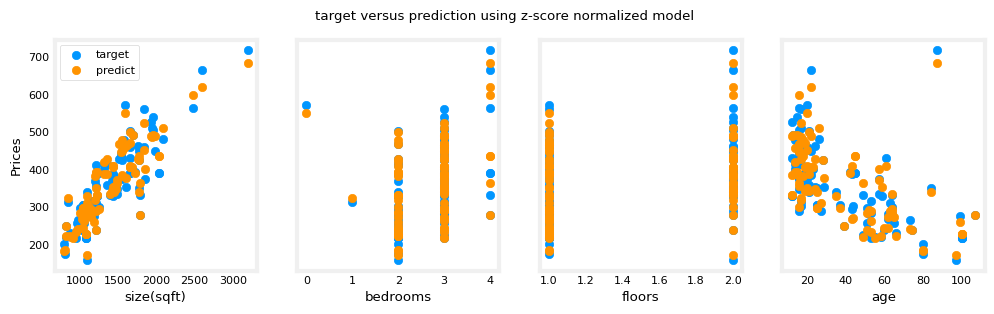

In [ ]:
fig,ax = plt.subplots(1,4,figsize=(12,3),sharey=True)
fig.suptitle("target versus prediction using z-score normalized model")
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],Y_train,label="target")
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,color=dlc["dlorange"],label="predict")
ax[0].set_ylabel("Prices"); ax[0].legend()

plt.show()